# Code Optimization

Code optimization is the process of making an application work more efficiently, usually without modifying its functionality and accuracy. Code optimization is usually concerned with the speed of processing, but can also be used to minimize the usage of different resources, such as memory, disk space, or network bandwidth.

Jaworski , Michal and Tarek Ziadé. Expert Python Programming. Packt Publishing, 2019.


Even the best logging, metrics, and tracing systems will give you only a rough overview of the performance problem. If you decide to fix it, you will have to perform a careful profiling process that will uncover detailed resource usage patterns

What are the main performance killers?
- Excessive complexity
- Excessive resource allocation and resource leaks
- Excessive I/O and blocking operations


## Code complexity
The two most popular ways to define application complexity are as follows:

**Cyclomatic complexity** - which is very often correlated with application performance.

**The Landau notation** - also known as big O notation, is an algorithm classification method that is useful in objectively judging code performance.

## Cyclomatic complexity
Short and sweet higher complexity = lower performance

| | | 
|:---|:---|
|Cyclomatic complexity value|Complexity class|
|1 to 10|Not complex|
|11 to 20|Moderately complex|
|21 to 50|Really complex|
|Above 50|Too complex|

## The big O notation
Defines how an algorithm is affected by the size of the input
To measure the big O notation, all constants and low-order terms are removed in order to focus on the portion that really matters when the size of the input data grows very large.


This is commonly expressed using **Big O notation**.

| Big O        | Name                | Example                |
|--------------|---------------------|------------------------|
| O(1)         | Constant time        | Accessing an array element |
| O(log n)     | Logarithmic time     | Binary search           |
| O(n)         | Linear time          | Iterating over a list   |
| O(n log n)   | Linearithmic time    | Efficient sorting (e.g., mergesort) |
| O(n²)        | Quadratic time       | Nested loops over data  |
| O(2ⁿ), O(n!) | Exponential / factorial | Recursive combinatorics |

### Example
```python
def function(n):
    for i in range(n):
        print(i)

```

the print() function will be executed n times therefor O(n)

## Profiling CPU usage

There are two ways to profile the code:

**Macro-profiling** - This profiles the whole program while it is being used and generates statistics.

**Micro-profiling** - This measures a precise part of the program by instrumenting it manually.




## Macro-profiling
You can do different tools tow of the available to you in Python:

- `profile`: A pure-Python profiler suitable for teaching or light use.
- `cProfile`: A C-optimized profiler, more efficient and widely used in practice.

In [ ]:
import time
class runIT(object):
    def __init__(self):
        for i in range(5): 
            self.heavy() 

    def medium(self): 
        time.sleep(0.01) 
     
    def light(self): 
        time.sleep(0.001) 
     
    def heavy(self): 
        for i in range(100): 
            self.light() 
            self.medium() 
            self.medium() 
        time.sleep(2) 

In [ ]:
%%prun -s cumulative -q -l 10 -T prun0
runs = runIT()

In [ ]:
print(open('prun0', 'r').read())

The meaning of each column is as follows:


| Column        | Description                                                                 |
|---------------|-----------------------------------------------------------------------------|
| `ncalls`      | Total number of calls to the function                                        |
| `tottime`     | Total time spent in the function (excluding subcalls)                        |
| `percall`     | `tottime` divided by `ncalls` (avg time per direct call)                    |
| `cumtime`     | Cumulative time including all subcalls                                      |
| `percall`     | `cumtime` divided by `ncalls` (avg time including subcalls)                 |


In [ ]:
import cProfile
profiler = cProfile.Profile()
profiler.runcall(runIT)
profiler.print_stats()

## Profiling your code line-by-line with line_profiler

Sometimes we need an even more detailed analysis of code performance 

This is particularly useful when optimizing algorithms, loops, or numerically intensive routines.

To profile code line-by-line, we need an external Python module named `line_profiler`.


```bash
pip install line_profiler
```


In [ ]:
%%writefile simulation.py 
import time
def medium(): 
    time.sleep(0.01) 
 
def light(): 
    time.sleep(0.001) 
 
def heavy(): 
    for i in range(100): 
        light() 
        medium() 
        medium() 
    time.sleep(2) 
 
def runIt(n): 
    for i in range(n): 
        heavy()

In [98]:
from simulation import runIt, heavy, medium, light
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


The `line_profiler` package integrates with IPython via the `%lprun`

Parameter | Description                                                               |
|---------------|-----------------------------------------------------------------------------|
`-T lprof0` | Redirects the profiler's output to a text file named lprof0.
`-f runIt` | Profiles the runIt function. You can specify multiple -f flags.
`runIt(5)` | The code to execute.


In [99]:
#%lprun -T lprof0 -f simulate simulate(50)
%lprun -T lprof0 -f heavy runIt(1)


*** Profile printout saved to text file 'lprof0'. 


Timer unit: 1e-09 s

Total time: 4.12612 s
File: /media/krispy/4A94A7D594A7C235/Users/Power/Documents/ETE/Git/ETE4990/LectureNotes/Lecture 18 - Optimization/simulation.py
Function: heavy at line 8

Line #      Hits         Time  Per Hit   % Time  Line Contents
     8                                           def heavy(): 
     9       101     228378.0   2261.2      0.0      for i in range(100): 
    10       100  107491203.0    1e+06      2.6          light() 
    11       100 1009254285.0    1e+07     24.5          medium() 
    12       100 1009075417.0    1e+07     24.5          medium() 
    13         1 2000073547.0    2e+09     48.5      time.sleep(2)

In [ ]:
print(open('lprof0', 'r').read())

In [100]:
#%%writefile rates.py
#from condenced from Lecture 11
import threading
import requests
import json
def fetch_rate(bases, symbols =['eur','jpy','usd'] ):
    for base in bases:
        web = "http://www.floatrates.com/daily/"+str(base)+".json"
        response = requests.get(web)
        rate = response.json()
        rate[base]= {'rate':1}
        
        #create a line to output the rate
        rates_line = ", ".join(
            [f"{symbol}{float(rate[symbol]['rate']):10.04}" 
             for symbol in symbols]
        )
        print(f"{base} = {rates_line}")

In [101]:
%lprun -T lprof1 -f fetch_rate fetch_rate(['eur','jpy','usd','rub','cad'])

eur = eur       1.0, jpy     162.1, usd     1.136
jpy = eur  0.006171, jpy       1.0, usd  0.007012
usd = eur      0.88, jpy     142.6, usd       1.0
rub = eur   0.01071, jpy     1.736, usd   0.01217
cad = eur    0.6341, jpy     102.8, usd    0.7206

*** Profile printout saved to text file 'lprof1'. 


Timer unit: 1e-09 s

Total time: 1.29601 s
File: /tmp/ipykernel_340036/40117780.py
Function: fetch_rate at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def fetch_rate(bases, symbols =['eur','jpy','usd'] ):
     7         6       5525.0    920.8      0.0      for base in bases:
     8         5       7289.0   1457.8      0.0          web = "http://www.floatrates.com/daily/"+str(base)+".json"
     9         5 1294001519.0    3e+08     99.8          response = requests.get(web)
    10         5    1448477.0 289695.4      0.1          rate = response.json()
    11         5       4743.0    948.6      0.0          rate[base]= {'rate':1}
    12                                                   
    13                                                   #create a line to output the rate
    14        10       8480.0    848.0      0.0          rates_line = ", ".join(
    15        35      74335.0   2123.9      0.0        

In [102]:
#to profile multiple function within the code you can do the following
from simulation import runIt, heavy, medium, light
from line_profiler import LineProfiler
lp = LineProfiler()
lp.add_function(light)
lp.add_function(medium)
lp.add_function(heavy)
lpp = lp(runIt)
lpp(1)


lp.print_stats()


Timer unit: 1e-09 s

Total time: 2.01685 s
File: /media/krispy/4A94A7D594A7C235/Users/Power/Documents/ETE/Git/ETE4990/LectureNotes/Lecture 18 - Optimization/simulation.py
Function: medium at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def medium(): 
     3       200 2016845263.0    1e+07    100.0      time.sleep(0.01) 

Total time: 0.107312 s
File: /media/krispy/4A94A7D594A7C235/Users/Power/Documents/ETE/Git/ETE4990/LectureNotes/Lecture 18 - Optimization/simulation.py
Function: light at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           def light(): 
     6       100  107311934.0    1e+06    100.0      time.sleep(0.001) 

Total time: 4.12907 s
File: /media/krispy/4A94A7D594A7C235/Users/Power/Documents/ETE/Git/ETE4990/LectureNotes/Lecture 18 - Optimization/simulation.py
Function: heavy at line 8

Line #      Hits         Time  Per Hit   % Time 

Or

In [ ]:
%lprun -T lprof0 -f runIt -f heavy -f medium -f light runIt(5)

In [ ]:
print(open('lprof2', 'r').read())

# Profiling the Memory Usage

Memory profiling helps identify unnecessary allocations that can degrade long-running systems.

Writing memory-efficient code is critical for performance, especially in high-throughput or data-intensive applications (e.g., when working with large NumPy arrays or data frames).


The `memory_profiler` package integrates with IPython via the `%memit` magic command, allowing you to measure the memory usage of individual lines or functions.


``` bash
!pip install memory_profiler
````

In [103]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [104]:
from rates import fetch_rate
%mprun -T mprof0 -f fetch_rate fetch_rate(['eur','jpy','usd','rub','cad'])

eur = eur       1.0, jpy     162.1, usd     1.136
jpy = eur  0.006171, jpy       1.0, usd  0.007012
usd = eur      0.88, jpy     142.6, usd       1.0
rub = eur   0.01071, jpy     1.736, usd   0.01217
cad = eur    0.6341, jpy     102.8, usd    0.7206


*** Profile printout saved to text file mprof0. 


Filename: /media/krispy/4A94A7D594A7C235/Users/Power/Documents/ETE/Git/ETE4990/LectureNotes/Lecture 18 - Optimization/rates.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     5   1091.6 MiB   1091.6 MiB           1   def fetch_rate(bases, symbols =['eur','jpy','usd'] ):
     6   1091.6 MiB      0.0 MiB           6       for base in bases:
     7   1091.6 MiB      0.0 MiB           5           web = "http://www.floatrates.com/daily/"+str(base)+".json"
     8   1091.6 MiB      0.0 MiB           5           response = requests.get(web)
     9   1091.6 MiB      0.0 MiB           5           rate = response.json()
    10   1091.6 MiB      0.0 MiB           5           rate[base]= {'rate':1}
    11                                                 
    12                                                 #create a line to output the rate
    13   1091.6 MiB      0.0 MiB          10           rates_line = ", ".join(
    14   1091.6 MiB      0.0 MiB          35               [f

In [105]:
%mprun -T mprof1 -f runIt runIt(1)



*** Profile printout saved to text file mprof1. 


Filename: /media/krispy/4A94A7D594A7C235/Users/Power/Documents/ETE/Git/ETE4990/LectureNotes/Lecture 18 - Optimization/simulation.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    15   1091.6 MiB   1091.6 MiB           1   def runIt(n): 
    16   1091.6 MiB      0.0 MiB           2       for i in range(n): 
    17   1091.6 MiB      0.0 MiB           1           heavy()

In [106]:
from memscript import my_func, my_func2
%mprun -T mprof2 -f my_func my_func()



*** Profile printout saved to text file mprof2. 


Filename: /media/krispy/4A94A7D594A7C235/Users/Power/Documents/ETE/Git/ETE4990/LectureNotes/Lecture 18 - Optimization/memscript.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     1   1091.6 MiB   1091.6 MiB           1   def my_func():
     2   1160.2 MiB     68.6 MiB           1       a = [2] * 9000000
     3   1229.0 MiB     68.8 MiB           1       b = [2] * 9000000
     4   1160.3 MiB    -68.7 MiB           1       del b
     5   1229.0 MiB     68.6 MiB           1       b = [2] * 9000000
     6   1229.0 MiB      0.0 MiB           1       return a

    Line 2: a is created, allocating ~69 MiB.

    Line 3: b is created, allocating an additional ~69 MiB.

    Line 4: b is deleted, freeing ~69 MiB.

    Line 5: b is reallocated, consuming ~69 MiB again.

In [107]:
%mprun -T mprof3 -f my_func2 my_func2()



*** Profile printout saved to text file mprof3. 


Filename: /media/krispy/4A94A7D594A7C235/Users/Power/Documents/ETE/Git/ETE4990/LectureNotes/Lecture 18 - Optimization/memscript.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     8   1091.7 MiB   1091.7 MiB           1   def my_func2():
     9   1160.3 MiB     68.6 MiB           1       a2 = [2] * 9000000
    10   1228.9 MiB     68.6 MiB           1       b2 = [2] * 9000000
    11   1229.0 MiB      0.1 MiB           1       b2 = [0] * 9000000
    12   1229.0 MiB      0.0 MiB           1       return a2

the memory_profiler IPython extension also comes with a %memit magic command that lets us benchmark the memory used by a single Python statement

In [108]:
%%memit 
import json
with open('ItemData.json') as f:
    items = json.load(f)


peak memory: 1091.68 MiB, increment: 0.00 MiB


## A special note for py scripts  

The `line_profiler` and `memory_profiler` tools requires functions to be decorated with @profile to measure their line-by-line execution time.

``` python
@profile
def some_function():
    # Your code here
```
### line_profiler
Once decorated, the function can be profiled using the `kernprof` command-line tool, which comes with line_profiler.

``` bash
kernprof -l -v example.py

```
    -l tells `kernprof` to use line-by-line profiling.

    -v outputs verbose results to the terminal.

This generates a example.py.lprof file which is then read and displayed by the profiler.

### memory_profiler

Once decorated, the function can be profiled using the `memory_profiler` command which is passed to python

``` bash
python -m memory_profiler example.py
```

An important note. memory_profiler output is not saved so you must output it 

``` bash
python -m memory_profiler example.py > memprofile_output.txt
```

# Practical Speed Improvements
Your application is slow but why? You can write you code in so many different ways. Here are some examples using `%timeit` to uncover performance bottlenecks.

In [109]:
# create a random list of 100,000 with a normal variance
import random
l = [random.normalvariate(0,1) for i in range(100000)]
print(type(l))
print(l[0:3])
len(l)

<class 'list'>
[-0.39516442423754755, 2.3828589358585397, 0.3213714501706496]


100000

## Indexed For-Loop
what most of you use

In [110]:
#function that computes the sum of all numbers in that list
def getSum():
    res = 0
    for i in range(len(l)):
        res = res + l[i]
    return res
%timeit -o getSum()

4.26 ms ± 92.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 4.26 ms ± 92.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

## Direct Iteration
a faster and more Pythonic: iteration which avoids the index lookup overhead.

In [111]:
#same function but using enumeration
def enumSum():
    res = 0
    for x in l:
        res = res + x
    return res
%timeit -n 100 enumSum()

2.35 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Built-in sum()

Built-in functions in Python are highly optimized, often implemented in C under the hood. This is usually the fastest method.

In [112]:
#using pythons built-in function to 
#compute the sum of all elements in a list
def builtInSum():
    return sum(l)
%timeit -n 100 builtInSum()

1.06 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# String Construction and Concatenation
strings can be very costly so they are prime targets for optimization

In [113]:
#Create List of Strings
strings = ['%.16f' % x for x in l]
print(type(strings))
print(strings[0:3])
len(strings)

<class 'list'>
['-0.3951644242375476', '2.3828589358585397', '0.3213714501706496']


100000

## Manual Concatenation 
probably the worst thing you could do

In [114]:
#Concatenating all strings in that list
def concatString():
    cat = strings[0]
    for s in strings[1:]:
        cat = cat + ', ' + s
    return cat
%timeit -n 1 concatString()

12.4 s ± 85.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## str.join() 
please use this...

In [115]:
def joinString():
    return ', '.join(strings)

%timeit joinString()

1.46 ms ± 30.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [116]:
print(concatString()[:24])
print(joinString()[:24])

KeyboardInterrupt: 

In [117]:
print(strings[:3])
print(l[:3])

['-0.3951644242375476', '2.3828589358585397', '0.3213714501706496']
[-0.39516442423754755, 2.3828589358585397, 0.3213714501706496]


## Please Sr., may I have another?

### List lookup O(n) Vs O(1)
O(n) - Bad

In [121]:
items = list(range(100))
def OnList():
    return 99999 in items

%timeit OnList()

950 ns ± 49 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


  O(1) - Mind blowing

In [122]:
#items_set = set(items)
items_set= set(range(100)) #same results
def O1set():
    return 99999 in items_set

%timeit O1set()

54.8 ns ± 1.99 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


list.__contains__() does linear search

set.__contains__() uses a hash table, giving near constant time lookup

## List Comprehensions vs append in a Loop

Loop + append

In [120]:
def build_list_loop():
    result = []
    for i in range(10000000):
        result.append(i * 2)
    return result

%timeit build_list_loop()

684 ms ± 5.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


List comprehension

In [123]:
def build_list_comp():
    return [i * 2 for i in range(10000000)]

%timeit build_list_comp()

648 ms ± 35.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Dictionary Lookup Optimization

In [1]:
d = {i: i * 2 for i in range(10000000)}


In [6]:
def redundant_dict_lookup():
    if 10000001 in d:
        return d[10000001]

%timeit redundant_dict_lookup()

77.4 ns ± 15.1 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [3]:
def efficient_dict_lookup():
    return d.get(9999999)

%timeit efficient_dict_lookup()

103 ns ± 30.5 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Global Vs Local (with a bonus)

In [135]:
#Use local variables inside loops:
#Accessing local variables is faster than globals or attribute lookups.
import math
gtotal = 0
def global_lookup():
    global gtotal
    for i in range(100000):
        gtotal += math.sqrt(i)
    return gtotal

%timeit global_lookup()


10.2 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [136]:

def local_passed(total):
    for i in range(100000):
        total += math.sqrt(i)
    return total

%timeit local_passed(0)


8.05 ms ± 863 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [141]:

def local_lookup():
    ltotal = 0
    for i in range(100000):
        ltotal += math.sqrt(i)
    return ltotal

%timeit -n 1000 local_lookup()

6.9 ms ± 90.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [139]:
def local_lookup():
    ltotal = 0
    sqrt = math.sqrt  # Local binding
    for i in range(100000):
        ltotal += sqrt(i)
    return ltotal

%timeit -n 1000 local_lookup()

5.85 ms ± 77.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Some other random stuff thank you ChatGPT

Watch out for unessasaraly complicated things

In [ ]:
#Bad
for i in range(10000):
    math.sqrt(4)

# Good
root = math.sqrt(4)
for i in range(10000):
    pass  # reuse root


   Extra special just for you local binding of a function

## Avoid Repeated Attribute Lookups in Loops

In [ ]:
# Bad
for x in items:
    total += x.value

# Good
value_getter = operator.attrgetter("value")
for x in items:
    total += value_getter(x)

Vectorize Computations with NumPy

In [ ]:
# Slow
[x ** 2 for x in range(100000)]

# Fast
import numpy as np
np.arange(100000) ** 2

# OMG ITS SO FAST

[Numba](https://numba.pydata.org/) is a Just-in-Time (JIT) compiler that translates a subset of Python (primarily numerical code) into optimized machine code using LLVM.


Performance speedups when compared to pure Python code can reach several orders of magnitude (10x to 1000x) and may even outmatch manually-vectorized NumPy code.

In this section, we will show you how to accelerate pure Python code generating a Mandelbrot fractal.


In [147]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
%matplotlib inline

In [143]:
size = 400
iterations = 100

To enable JIT acceleration, decorate your functions with:

```python
from numba import jit

@jit
def compute(...):
    #code goes here
```


In [152]:

def mandelbrot_python(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

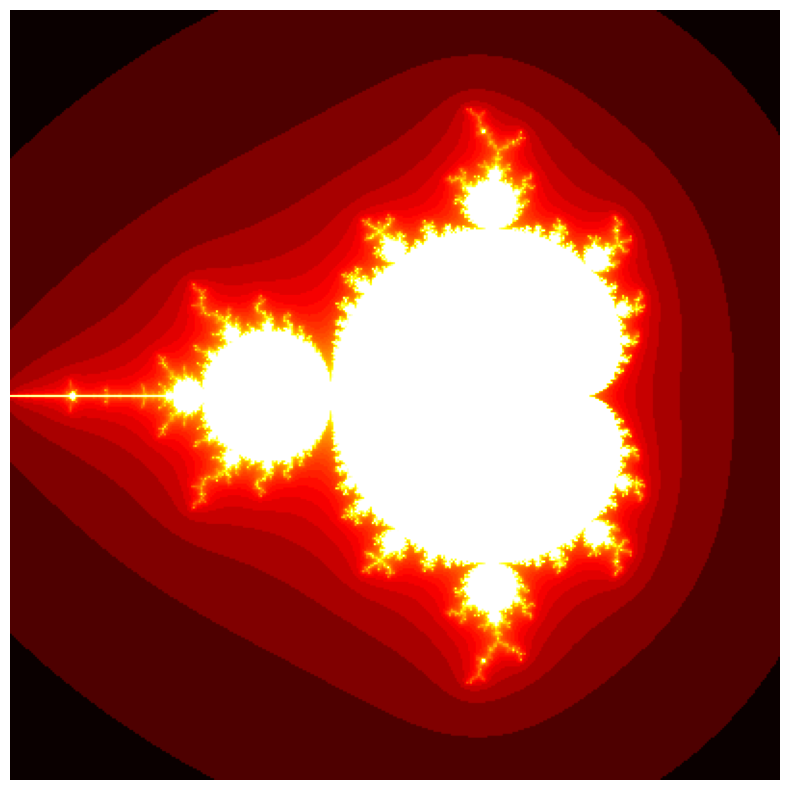

In [150]:
m = mandelbrot_python(size, iterations)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m), cmap=plt.cm.hot)
ax.set_axis_off()

In [151]:
%timeit mandelbrot_python(size, iterations)

39.7 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
#!pip install numba
from numba import jit

In [153]:
%timeit mandelbrot_python(size, iterations) #do it again with numba

5.13 s ± 199 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## NOTE on JIT Compilation: 
Python bytecode is normally interpreted at runtime by the Python interpreter (most often, CPython). 

Numba functions are parsed and translated directly to machine code ahead of execution, using a powerful compiler architecture named Low Level Virtual Machine (LLVM).

Numba generally gives the most impressive speedups on functions that involve tight loops on NumPy arrays.



The @jit can only compile code that is also decorated with @jit or there is a known replacement inside Numba.

Please see http://numba.pydata.org/numba-doc/latest/user/5minguide.html#will-numba-work-for-my-code for a quick description of what Numba support.